In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from wordcloud import WordCloud
from scipy import stats
sns.set_style("whitegrid")

In [2]:
columns=['Page_likes','Page_checkins','Page_interest','Page_category',
         'cc1_min','cc1_max','cc1_avg','cc1_med','cc1_std',
         'cc2_min','cc2_max','cc2_avg','cc2_med','cc2_std',
         'cc3_min','cc3_max','cc3_avg','cc3_med','cc3_std',
         'cc4_min','cc4_max','cc4_avg','cc4_med','cc4_std',
         'cc5_min','cc5_max','cc5_avg','cc5_med','cc5_std',
         'CC1','CC2','CC3','CC4','CC5',
         'base_time','post_length','post_shares','post_promotion',
         'hour_target',
         'sunday_pub','monday_pub','tuesday_pub','wednesday_pub','thursday_pub','friday_pub','saturday_pub',
         'sunday_base','monday_base','tuesday_base','wednesday_base','thursday_base','friday_base','saturday_base',
         'target'
        ] 

In [3]:
#read the data
data = pd.read_csv('Desktop/MML_project/FacebookCommentVolume_Regression/Project/FB_Dataset/Training/Features_Variant_1.csv', sep = ',', encoding = 'unicode_escape', header=None, names=columns)


In [4]:
data.head()

,Page_likes,Page_checkins,Page_interest,Page_category,cc1_min,cc1_max,cc1_avg,cc1_med,cc1_std,cc2_min,...,friday_pub,saturday_pub,sunday_base,monday_base,tuesday_base,wednesday_base,thursday_base,friday_base,saturday_base,target
0,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0,0,0,0,0,0,0,0,1,0
1,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0,0,0,0,0,0,0,1,0,0
2,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,1,0,0,0,0,0,0,0,1,0
3,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,1,0,0,1,0,0,0,0,0,0
4,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0,0,0,0,0,1,0,0,0,0


In [52]:
data.describe()

,Page_likes,Page_checkins,Page_interest,Page_category,CC1,CC2,CC3,CC4,CC5,base_time,...,friday_pub,saturday_pub,sunday_base,monday_base,tuesday_base,wednesday_base,thursday_base,friday_base,saturday_base,target
count,4.094900e+04,40949.000000,4.094900e+04,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,...,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000
mean,1.313814e+06,4676.133752,4.480025e+04,24.254780,55.720384,22.186647,19.649686,52.631591,2.536961,35.322035,...,0.146157,0.136926,0.141640,0.132506,0.137635,0.148599,0.150846,0.143886,0.144888,7.322889
std,6.785752e+06,20593.184863,1.109338e+05,19.950583,136.975705,77.124263,71.078576,128.179920,94.202974,20.916864,...,0.353268,0.343774,0.348684,0.339045,0.344520,0.355698,0.357903,0.350979,0.351992,35.494550
min,3.600000e+01,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,-1366.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.673400e+04,0.000000,6.980000e+02,9.000000,2.000000,0.000000,0.000000,2.000000,-6.000000,17.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.929110e+05,0.000000,7.045000e+03,18.000000,11.000000,2.000000,0.000000,10.000000,0.000000,35.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.204214e+06,99.000000,5.026400e+04,32.000000,46.000000,12.000000,9.000000,44.000000,3.000000,53.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,4.869723e+08,186370.000000,6.089942e+06,106.000000,2341.000000,2079.000000,1605.000000,2184.000000,2079.000000,72.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1305.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 54 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Page_likes      40949 non-null  int64  
 1   Page_checkins   40949 non-null  int64  
 2   Page_interest   40949 non-null  int64  
 3   Page_category   40949 non-null  int64  
 4   cc1_min         40949 non-null  float64
 5   cc1_max         40949 non-null  float64
 6   cc1_avg         40949 non-null  float64
 7   cc1_med         40949 non-null  float64
 8   cc1_std         40949 non-null  float64
 9   cc2_min         40949 non-null  float64
 10  cc2_max         40949 non-null  float64
 11  cc2_avg         40949 non-null  float64
 12  cc2_med         40949 non-null  float64
 13  cc2_std         40949 non-null  float64
 14  cc3_min         40949 non-null  float64
 15  cc3_max         40949 non-null  float64
 16  cc3_avg         40949 non-null  float64
 17  cc3_med         40949 non-null 

In [6]:
data = data.drop(['cc1_min'],axis='columns')
data = data.drop(['cc1_max'],axis='columns')
data = data.drop(['cc1_avg'],axis='columns')
data = data.drop(['cc1_med'],axis='columns')
data = data.drop(['cc1_std'],axis='columns')
data = data.drop(['cc2_min'],axis='columns')
data = data.drop(['cc2_max'],axis='columns')
data = data.drop(['cc2_avg'],axis='columns')
data = data.drop(['cc2_med'],axis='columns')
data = data.drop(['cc2_std'],axis='columns')
data = data.drop(['cc3_min'],axis='columns')
data = data.drop(['cc3_max'],axis='columns')
data = data.drop(['cc3_avg'],axis='columns')
data = data.drop(['cc3_med'],axis='columns')
data = data.drop(['cc3_std'],axis='columns')
data = data.drop(['cc4_min'],axis='columns')
data = data.drop(['cc4_max'],axis='columns')
data = data.drop(['cc4_avg'],axis='columns')
data = data.drop(['cc4_med'],axis='columns')
data = data.drop(['cc4_std'],axis='columns')
data = data.drop(['cc5_min'],axis='columns')
data = data.drop(['cc5_max'],axis='columns')
data = data.drop(['cc5_avg'],axis='columns')
data = data.drop(['cc5_med'],axis='columns')
data = data.drop(['cc5_std'],axis='columns')

In [7]:
#Check null and sum them
data.isnull().sum()
#there are no null values

Page_likes        0
Page_checkins     0
Page_interest     0
Page_category     0
CC1               0
CC2               0
CC3               0
CC4               0
CC5               0
base_time         0
post_length       0
post_shares       0
post_promotion    0
hour_target       0
sunday_pub        0
monday_pub        0
tuesday_pub       0
wednesday_pub     0
thursday_pub      0
friday_pub        0
saturday_pub      0
sunday_base       0
monday_base       0
tuesday_base      0
wednesday_base    0
thursday_base     0
friday_base       0
saturday_base     0
target            0
dtype: int64

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of target')

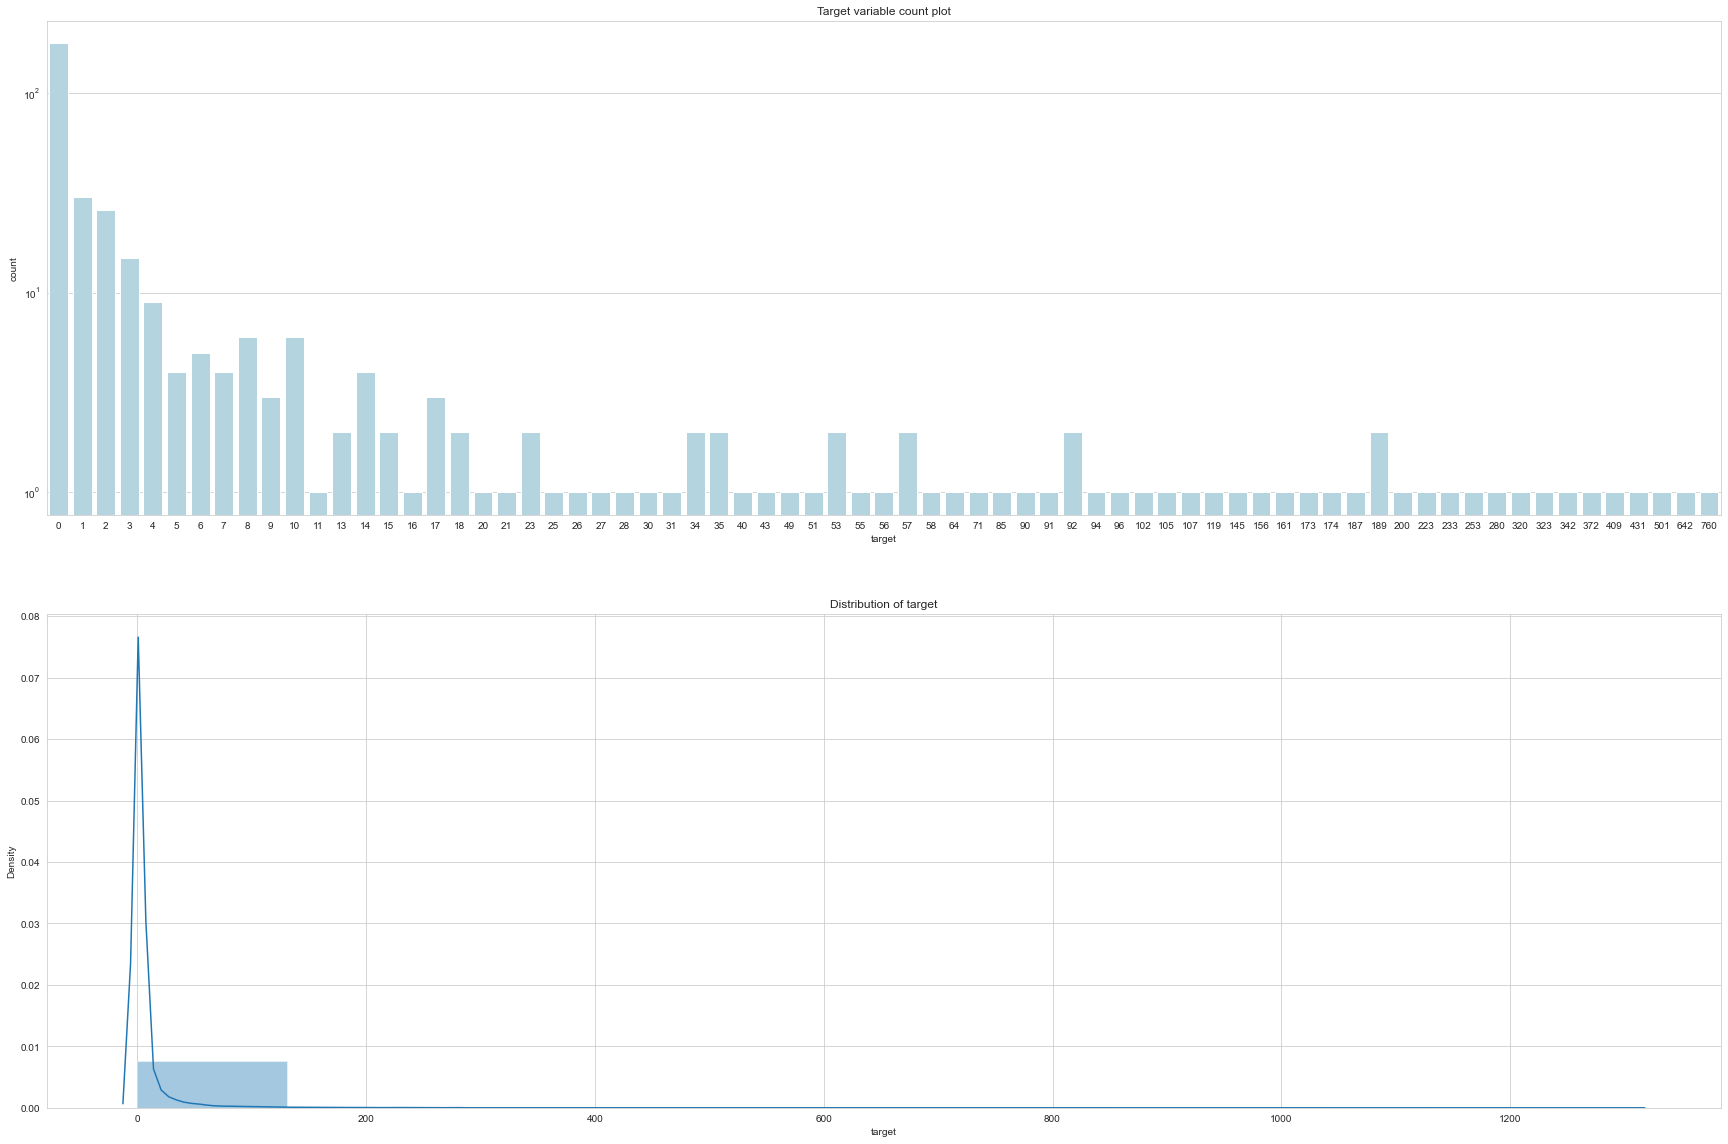

In [8]:
'''Data visualization'''
#starting from plotting target value in order to see 
#how the target value is distributed

f,axs=plt.subplots(figsize=(30,20),nrows=2)
values=list(set(data['target'].astype('int')))
sns.countplot(values,data=data['target'].astype('int'), color='lightblue',ax=axs[0])
axs[0].set(yscale='log')
axs[0].set_title('Target variable count plot')


sns.distplot(data.target,bins=10,ax=axs[1])
axs[1].set_title('Distribution of target')

#plt.savefig('distribution_of_target.png', dpi=300, bbox_inches='tight',transparent=True)


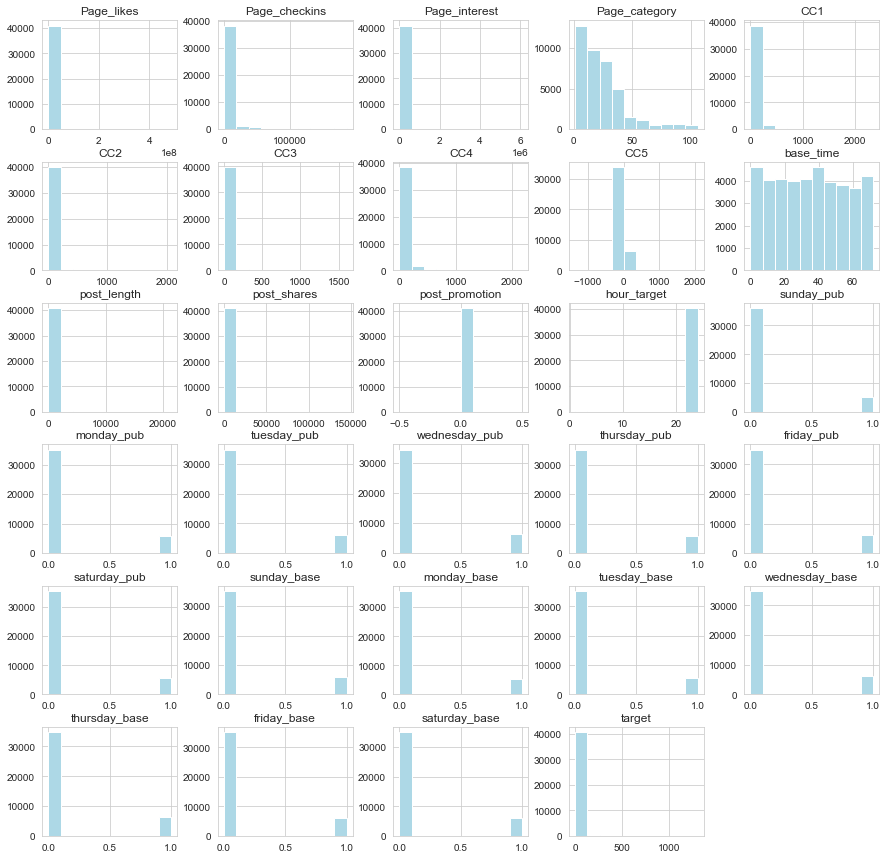

In [9]:
#plots of each feature
data.hist(figsize=(15,15), color='lightblue')
#plt.savefig('distribution_of_features.png', dpi=300, bbox_inches='tight')
plt.show()

Text(0, 0.5, 'NumPostsPublished')

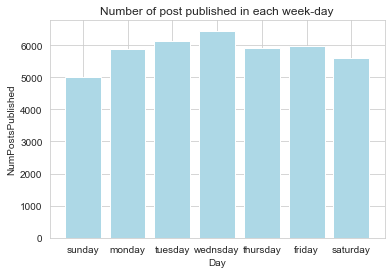

In [10]:
days=["sunday", "monday", "tuesday", "wednsday", "thursday", "friday", "saturday"]
sund_pub= (data['sunday_pub']==1).sum()
mon_pub= (data['monday_pub']==1).sum()
tue_pub= (data['tuesday_pub']==1).sum()
wed_pub= (data['wednesday_pub']==1).sum()
thur_pub= (data['thursday_pub']==1).sum()
fri_pub= (data['friday_pub']==1).sum()
sat_pub= (data['saturday_pub']==1).sum()
count_pub= [sund_pub, mon_pub, tue_pub,wed_pub,thur_pub,fri_pub,sat_pub]

plt.bar(days, count_pub, color='lightblue')
plt.title('Number of post published in each week-day')
plt.xlabel('Day')
plt.ylabel('NumPostsPublished')
#plt.savefig('NumberOfPostPublishedInEachWeekDay.png', dpi=100, bbox_inches='tight')


Text(0, 0.5, 'Occurrences')

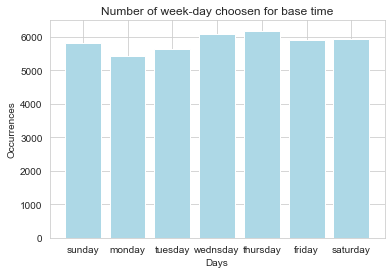

In [11]:
sund_pub= (data['sunday_base']==1).sum()
mon_pub= (data['monday_base']==1).sum()
tue_pub= (data['tuesday_base']==1).sum()
wed_pub= (data['wednesday_base']==1).sum()
thur_pub= (data['thursday_base']==1).sum()
fri_pub= (data['friday_base']==1).sum()
sat_pub= (data['saturday_base']==1).sum()
count_base= [sund_pub, mon_pub, tue_pub,wed_pub,thur_pub,fri_pub,sat_pub]

plt.bar(days, count_base, color='lightblue')
plt.title('Number of week-day choosen for base time')
plt.xlabel('Days')
plt.ylabel('Occurrences')
#plt.savefig('NumberOfPostPublishedInEachWeek-day.png', dpi=300, bbox_inches='tight')

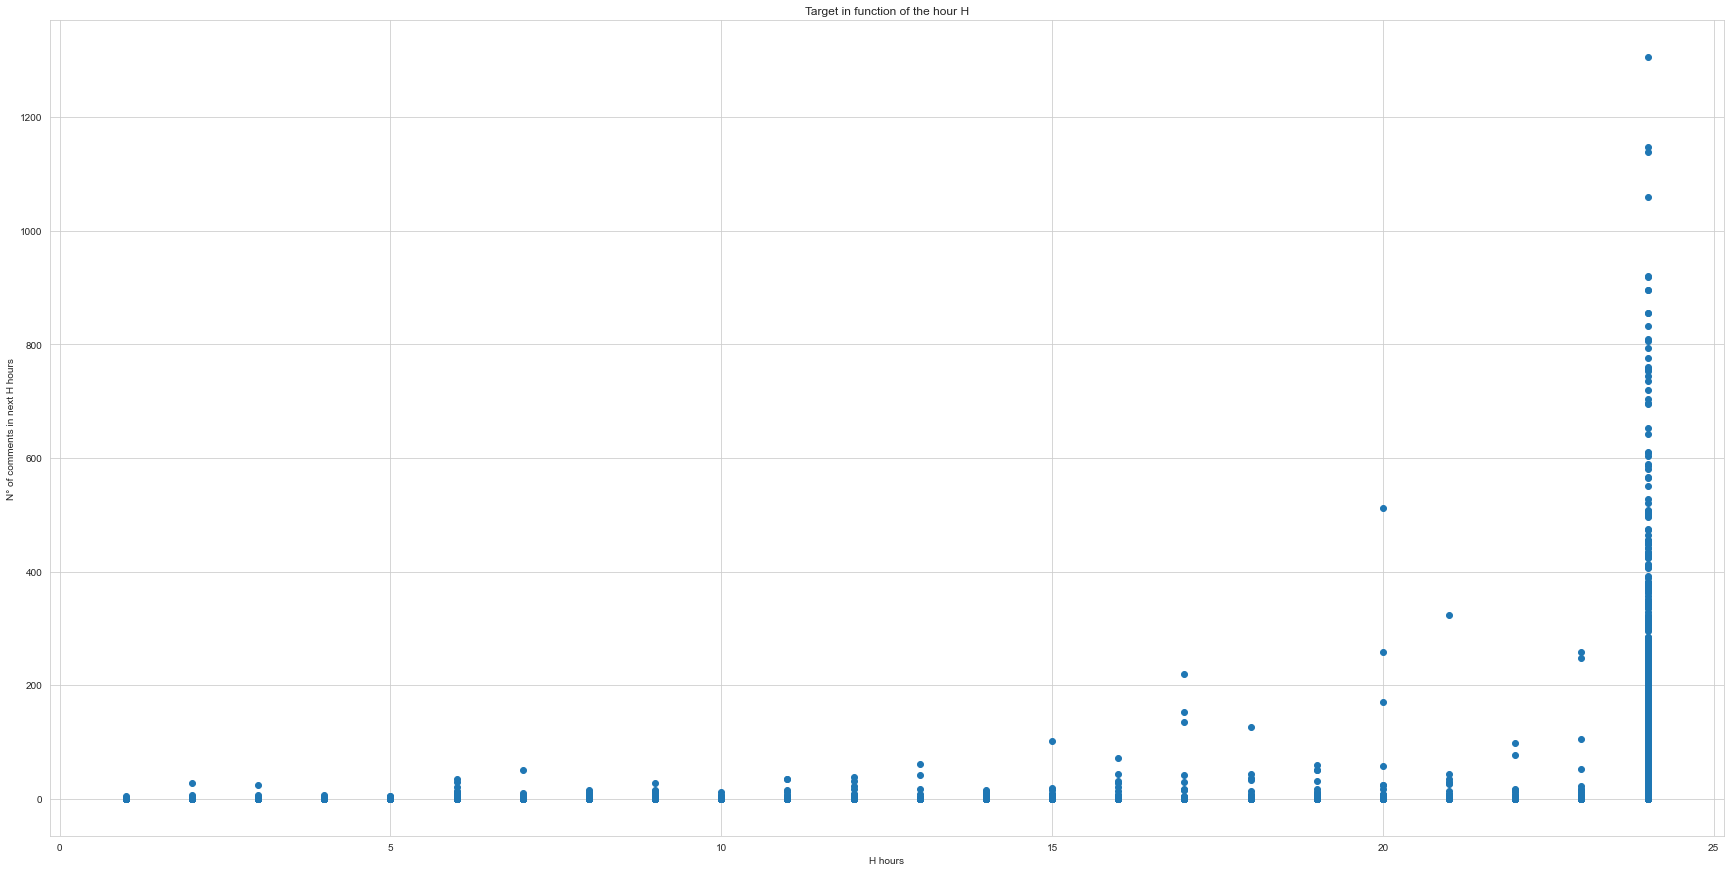

In [12]:
fig,axs=plt.subplots(figsize=(30, 15),nrows=1)

x = data['hour_target']
y = data['target']
axs.scatter(x, y)
axs.set_ylabel("N° of comments in next H hours")
axs.set_xlabel("H hours")
axs.set_title("Target in function of the hour H")

#plt.savefig('Target in function of the hour H c.png', dpi=300, bbox_inches='tight')


In [13]:
#Check if there are some promoted posts
promoted_posts=0
for i in range(len(data)):
    if( data["post_promotion"][i]==1):
        promoted_posts+=1
promoted_posts   
data = data.drop(['post_promotion'],axis='columns')

In [14]:
plt.figure(figsize=(18, 9))
sns.set(style="whitegrid")
corr = data.corr()
corr

,Page_likes,Page_checkins,Page_interest,Page_category,CC1,CC2,CC3,CC4,CC5,base_time,...,friday_pub,saturday_pub,sunday_base,monday_base,tuesday_base,wednesday_base,thursday_base,friday_base,saturday_base,target
Page_likes,1.000000,0.044839,0.623436,-0.042167,0.105624,0.077773,0.071448,0.104064,0.009764,-0.005717,...,-0.009503,0.003397,-0.003665,0.006125,-0.000433,0.003840,0.006070,-0.003045,-0.008862,0.058918
Page_checkins,0.044839,1.000000,0.166850,-0.060181,0.098352,0.061610,0.064703,0.101214,0.001620,0.004760,...,-0.005844,0.007936,-0.000324,0.008330,0.002385,-0.006826,0.000313,0.000873,-0.004329,0.022982
Page_interest,0.623436,0.166850,1.000000,-0.148685,0.329139,0.251529,0.217939,0.329399,0.041487,-0.024592,...,-0.027627,-0.007700,-0.016521,-0.001683,0.006739,0.020424,0.024486,-0.011423,-0.022755,0.177330
Page_category,-0.042167,-0.060181,-0.148685,1.000000,-0.145932,-0.103961,-0.094728,-0.148661,-0.013638,0.003876,...,0.002942,-0.002263,0.008858,-0.004926,-0.008104,-0.003160,-0.002917,0.011931,-0.001835,-0.073673
CC1,0.105624,0.098352,0.329139,-0.145932,1.000000,0.657492,0.713641,0.996736,-0.000170,0.055679,...,-0.016800,-0.009607,-0.007981,0.001277,0.002678,0.004524,0.008977,-0.002769,-0.006884,0.326882
CC2,0.077773,0.061610,0.251529,-0.103961,0.657492,1.000000,0.193922,0.689478,0.672384,-0.211857,...,-0.016901,-0.012104,-0.010910,-0.000257,0.004982,0.010386,0.015414,-0.006255,-0.013753,0.528696
CC3,0.071448,0.064703,0.217939,-0.094728,0.713641,0.193922,1.000000,0.699315,-0.595761,0.087907,...,-0.010799,-0.004096,-0.010383,-0.003587,-0.000525,0.001999,0.006684,0.006931,-0.001474,0.072088
CC4,0.104064,0.101214,0.329399,-0.148661,0.996736,0.689478,0.699315,1.000000,0.036826,0.039560,...,-0.017262,-0.010247,-0.008746,0.001405,0.002648,0.005174,0.009113,-0.003180,-0.006605,0.341741
CC5,0.009764,0.001620,0.041487,-0.013638,-0.000170,0.672384,-0.595761,0.036826,1.000000,-0.239775,...,-0.005689,-0.006818,-0.001098,0.002496,0.004475,0.006995,0.007576,-0.010351,-0.010148,0.378453
base_time,-0.005717,0.004760,-0.024592,0.003876,0.055679,-0.211857,0.087907,0.039560,-0.239775,1.000000,...,0.012693,0.006977,0.028345,0.030247,-0.020801,-0.035557,-0.012576,-0.000517,0.012380,-0.221962


<Figure size 1296x648 with 0 Axes>

<ipython-input-15-2f63905f7e51>:11: UserWarning: Attempting to set identical bottom == top == 0.5 results in singular transformations; automatically expanding.
  plt.ylim(b, t)


<AxesSubplot:>

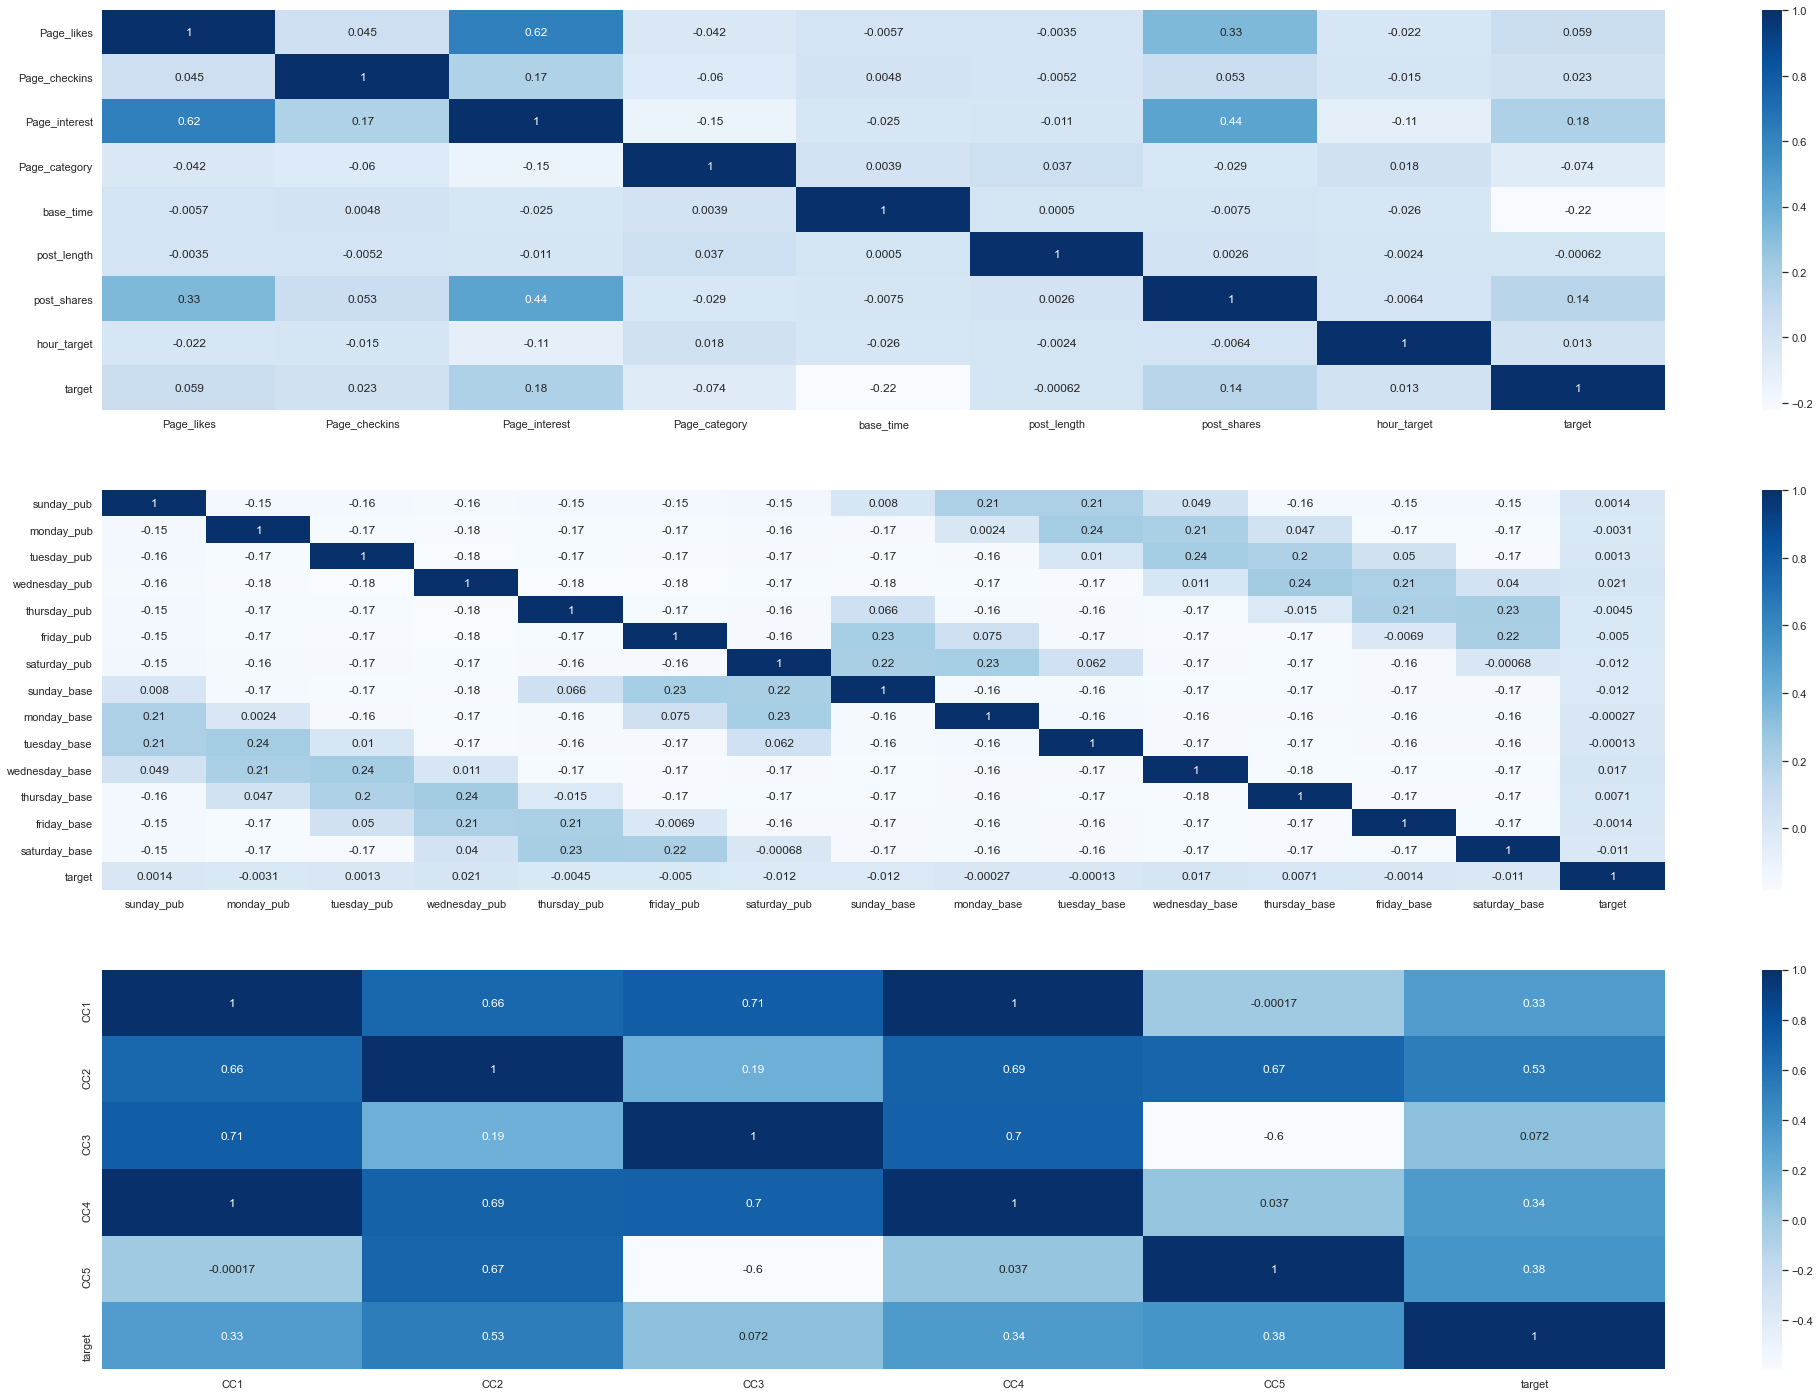

In [15]:
fig,axs=plt.subplots(figsize=(35, 25),nrows=3)

corr1=['Page_likes','Page_checkins','Page_interest','Page_category','base_time','post_length','post_shares',
         'hour_target', 'target']
sns.set(style="whitegrid")
corr = data[corr1].corr()
sns.heatmap(corr,annot=True,ax=axs[0], cmap="Blues")
b, t = plt.ylim()
b += 0.5 
t -= 0.5 
plt.ylim(b, t) 

corr2=['sunday_pub','monday_pub','tuesday_pub','wednesday_pub','thursday_pub','friday_pub','saturday_pub','sunday_base','monday_base','tuesday_base','wednesday_base','thursday_base','friday_base','saturday_base','target']
sns.set(style="whitegrid")
corr = data[corr2].corr()
sns.heatmap(corr,annot=True,ax=axs[1],cmap="Blues")

corr3=[ 'CC1','CC2','CC3','CC4','CC5','target']
sns.set(style="whitegrid")
corr = data[corr3].corr()
sns.heatmap(corr,annot=True,ax=axs[2],cmap="Blues")

(-0.5, 3999.5, 1999.5, -0.5)

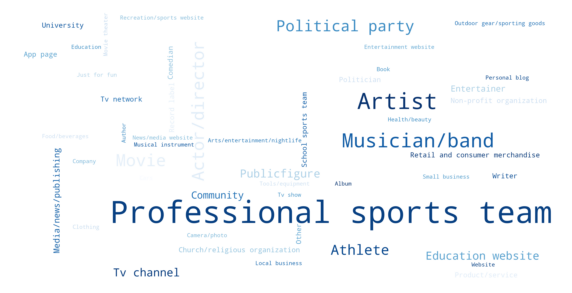

In [17]:
# 106 different categories 
category_val=data['Page_category'].values.tolist()

category=['Product/service','Publicfigure','Retail and consumer merchandise','Athlete','Education website','Arts/entertainment/nightlife','Aerospace/defense',
          'Actor/director','Professional sports team','Travel/leisure','Arts/humanities website','Food/beverages','Record label','Movie','Song','Community',
          'Company','Artist','Non-governmental organization (ngo)','Media/news/publishing','Cars','Clothing','Local business','Musician/band','Politician',
          'News/media website','Education','Author','Sports event','Restaurant/cafe','School sports team','University','Tv show','Website','Outdoor gear/sporting goods',
          'Political party','Sports league','Entertainer','Church/religious organization','Non-profit organization','Automobiles and parts','Tv channel','Telecommunication',
          'Entertainment website','Shopping/retail','Personal blog','App page','Vitamins/supplements','Professional services','Movie theater','Software','Magazine','Electronics',
          'School', 'Just for fun','Club','Comedian','Sports venue','Sports/recreation/activities','Publisher','Tv network','Health/medical/pharmacy',
          'Studio','Home decor','Jewelry/watches','Writer','Health/beauty','Music video','Appliances','Computers/technology','Insurance company',
          'Music award','Recreation/sports website','Reference website','Business/economy website','Bar','Album','Games/toys','Camera/photo','Book','Producer',
          'Landmark','Cause','Organization','Tv/movie award','Hotel','Health/medical/pharmaceuticals','Transportation','Local/travel website','Musical instrument',
          'Radio station','Other','Computers','Phone/tablet','Coach','Tools/equipment','Internet/software','Bank/financial institution','Society/culture website','Small business',
          'News personality','Teens/kids website','Government official','Photographer','Spas/beauty/personal care','Video game']

to_category=[category[i-1]for i in category_val]
sum_category=[0 for i in range(len(category))]

target=data['target'].values.tolist()
for idx,y in enumerate(category_val):
    sum_category[y-1]+=target[idx]

dic_category=dict(zip(category,sum_category))
    
wc1 = WordCloud(scale=10,colormap="Blues",background_color="white",collocations=False).generate_from_frequencies(dic_category)
plt.figure(figsize=(10,10))
plt.imshow(wc1,interpolation="bilinear")
plt.axis("off")
#plt.savefig('WordCloudCategories.png', dpi=300, bbox_inches='tight')

In [18]:
#dummification of categories not to get bias
dummy_category=pd.get_dummies(data['Page_category'],prefix="category_")
dummy_category.head()
col=dummy_category.columns.tolist()
## if some categories are not contained in the training data : we created columns 
for i in range (1,107):
    if 'category__'+str(i) not in col:
        dummy_category['category__'+str(i)]=[0 for i in range(40949)]

Text(0.5, 1.0, 'Boxplot of post_lenght')

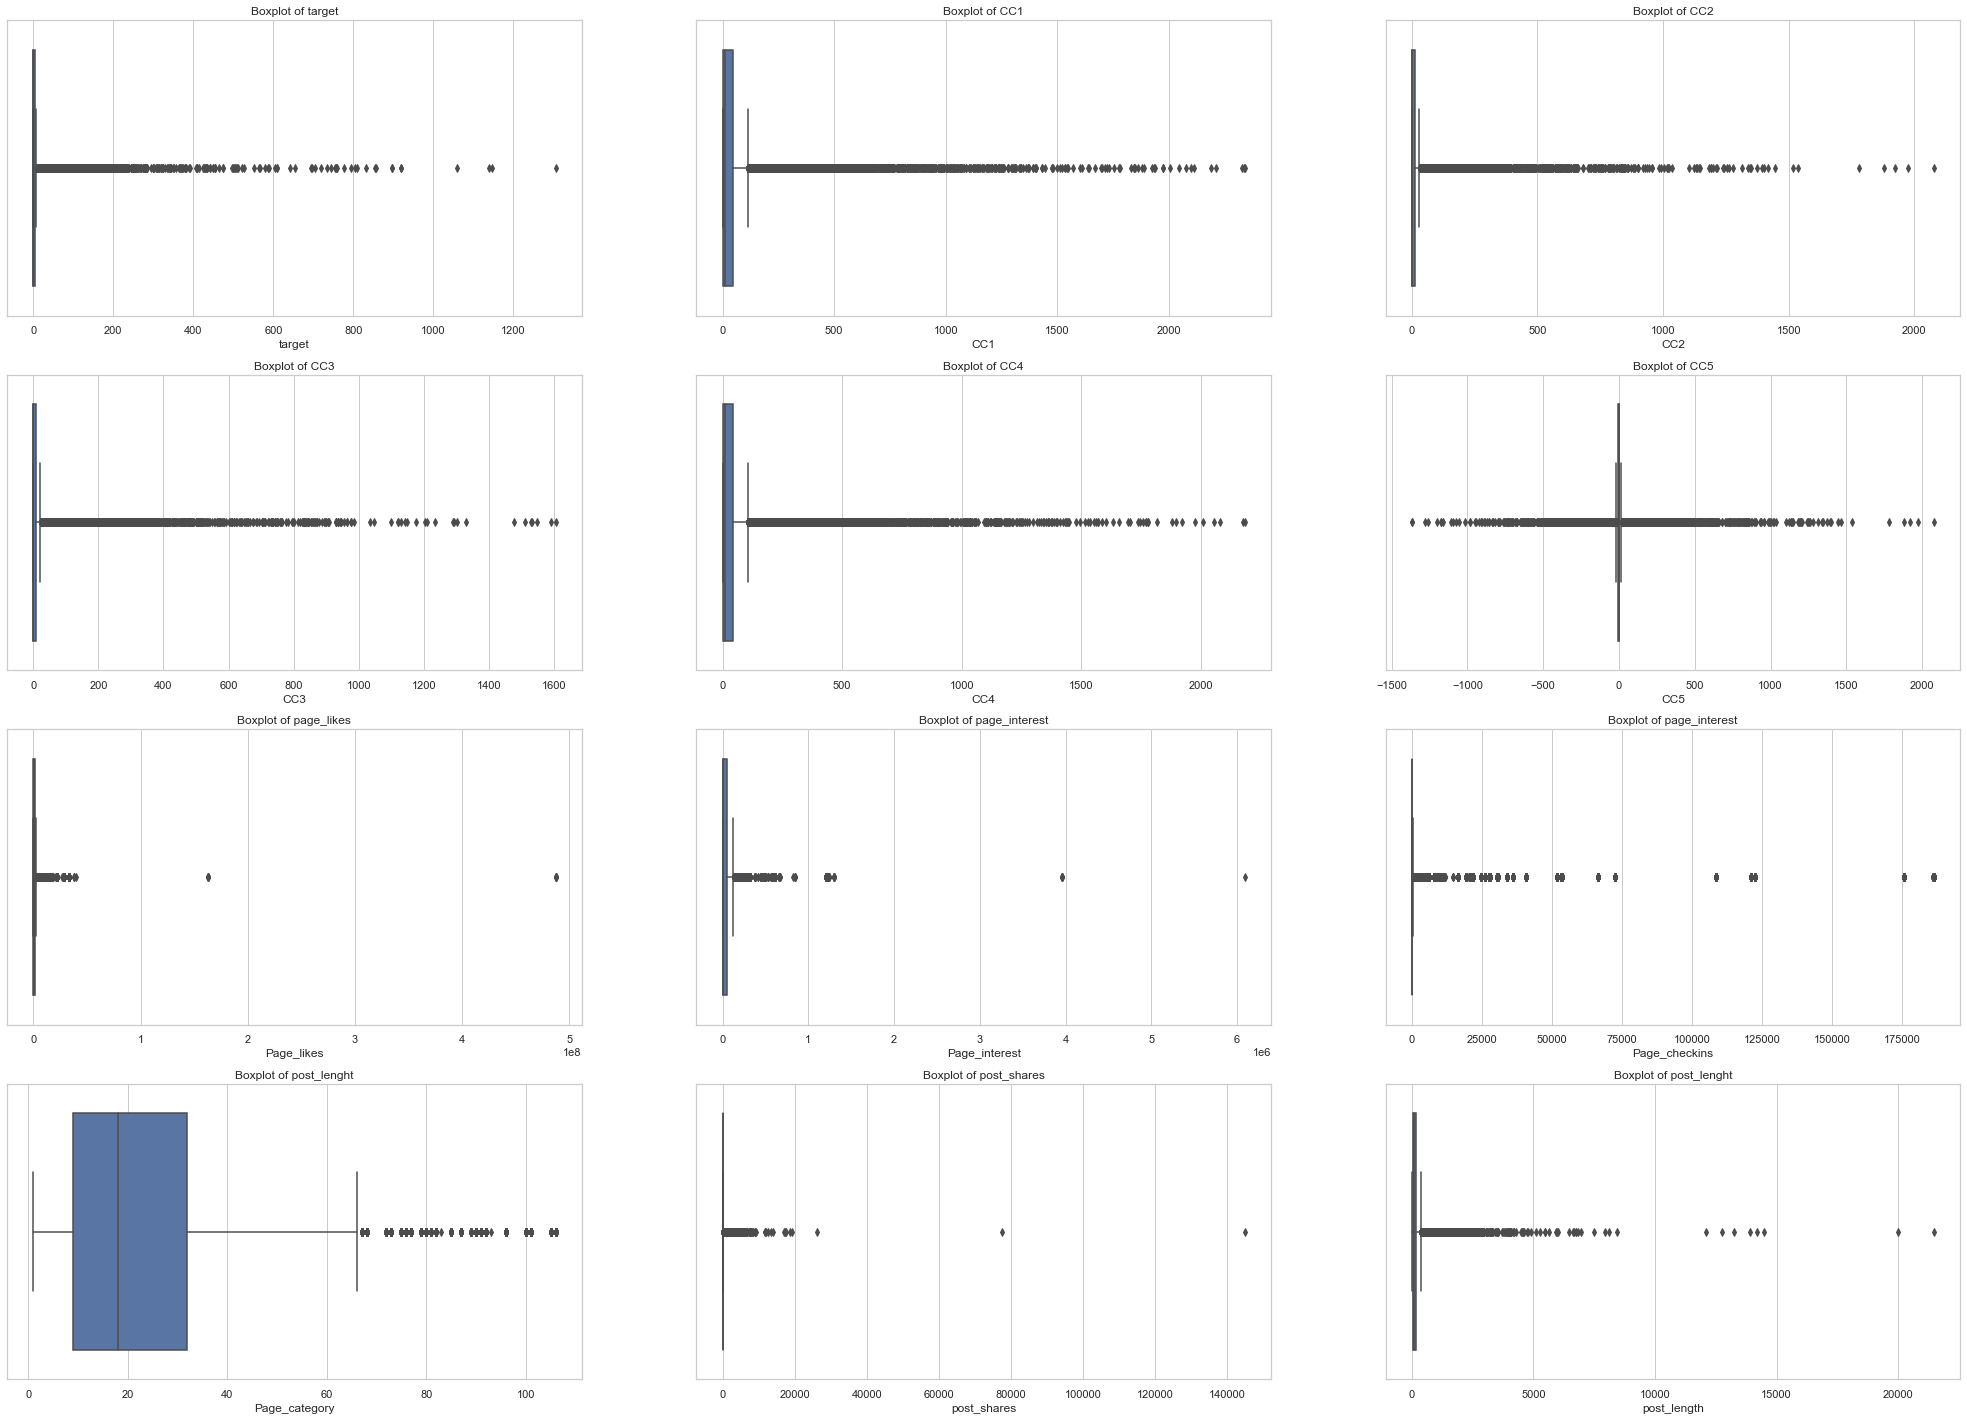

In [19]:
#Outliers detection
fig, axs = plt.subplots(ncols=3,nrows=4,figsize=(35,25))

sns.boxplot(x=data["target"],ax=axs[0][0])
axs[0][0].set_title('Boxplot of target')

sns.boxplot(x=data["CC1"],ax=axs[0][1])
axs[0][1].set_title('Boxplot of CC1')

sns.boxplot(x=data["CC2"],ax=axs[0][2])
axs[0][2].set_title('Boxplot of CC2')

sns.boxplot(x=data["CC3"],ax=axs[1][0])
axs[1][0].set_title('Boxplot of CC3')

sns.boxplot(x=data["CC4"],ax=axs[1][1])
axs[1][1].set_title('Boxplot of CC4')

sns.boxplot(x=data["CC5"],ax=axs[1][2])
axs[1][2].set_title('Boxplot of CC5')

sns.boxplot(x=data["Page_likes"],ax=axs[2][0])
axs[2][0].set_title('Boxplot of page_likes')

sns.boxplot(x=data["Page_interest"],ax=axs[2][1])
axs[2][1].set_title('Boxplot of page_interest')

sns.boxplot(x=data["Page_checkins"],ax=axs[2][2])
axs[2][2].set_title('Boxplot of page_interest')

sns.boxplot(x=data["Page_category"],ax=axs[3][0])
axs[3][0].set_title('Boxplot of post_lenght')

sns.boxplot(x=data["post_shares"],ax=axs[3][1])
axs[3][1].set_title('Boxplot of post_shares')

sns.boxplot(x=data["post_length"],ax=axs[3][2])
axs[3][2].set_title('Boxplot of post_lenght')
#plt.savefig('BoxplotsBefore c.png', dpi=300, bbox_inches='tight')

In [22]:
z = np.abs(stats.zscore(data))
threshold = 3
data_o = data[(z < 3).all(axis=1)]
print(data.shape)
print(data_o.shape)

(40949, 28)
(35893, 28)


Text(0.5, 1.0, 'Boxplot of post_lenght')

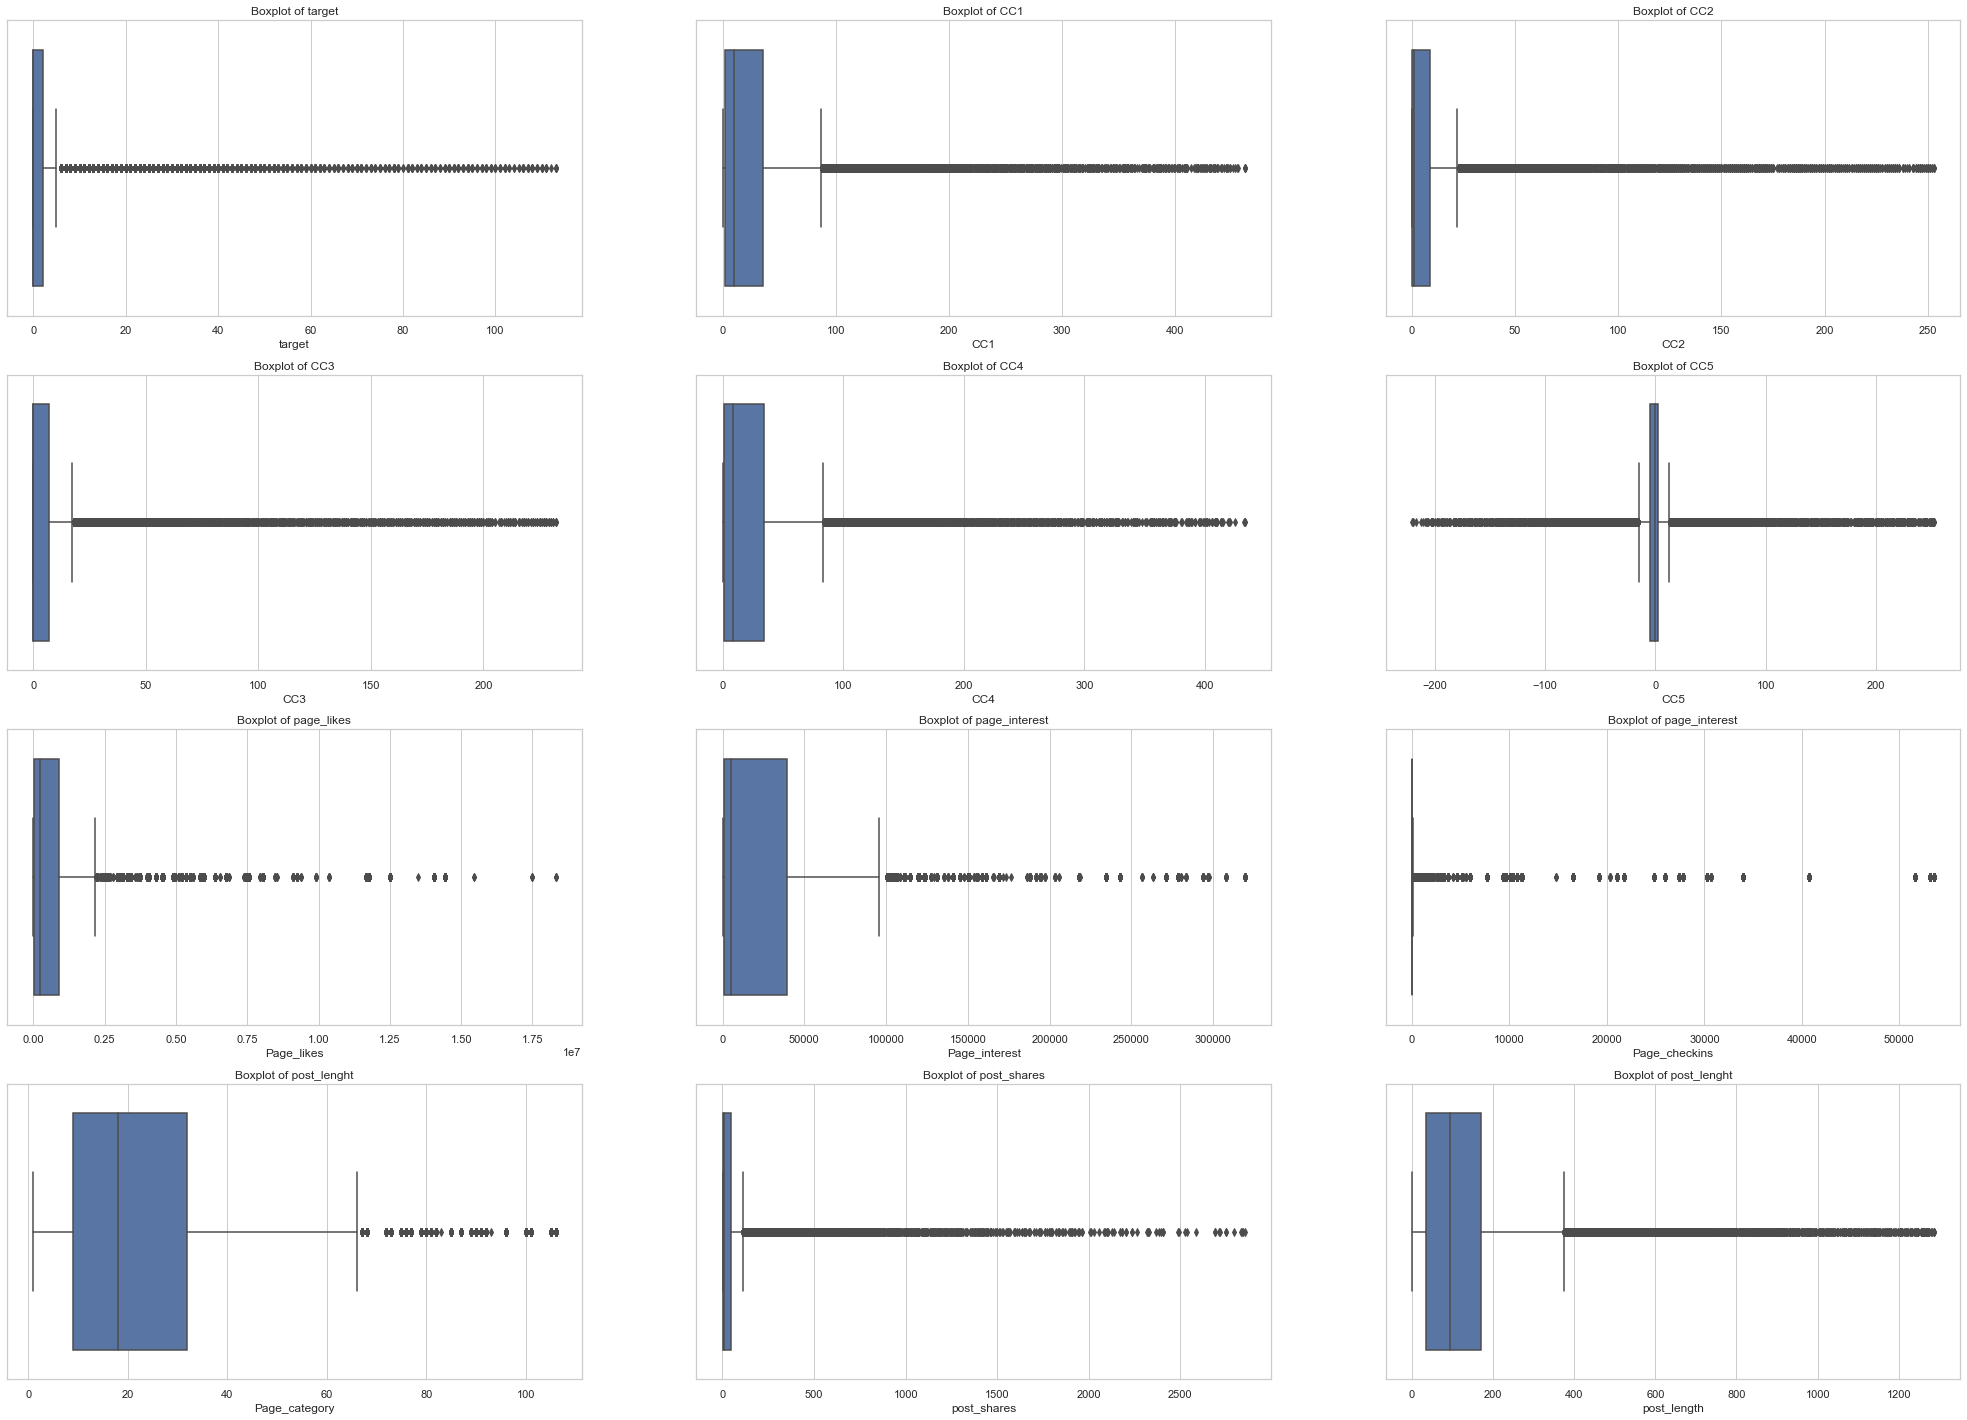

In [23]:
#Verify the new box plot after outliers removal
fig, axs = plt.subplots(ncols=3,nrows=4,figsize=(35,25))
sns.boxplot(x=data_o["target"],ax=axs[0][0])
axs[0][0].set_title('Boxplot of target')

sns.boxplot(x=data_o["CC1"],ax=axs[0][1])
axs[0][1].set_title('Boxplot of CC1')

sns.boxplot(x=data_o["CC2"],ax=axs[0][2])
axs[0][2].set_title('Boxplot of CC2')

sns.boxplot(x=data_o["CC3"],ax=axs[1][0])
axs[1][0].set_title('Boxplot of CC3')

sns.boxplot(x=data_o["CC4"],ax=axs[1][1])
axs[1][1].set_title('Boxplot of CC4')

sns.boxplot(x=data_o["CC5"],ax=axs[1][2])
axs[1][2].set_title('Boxplot of CC5')

sns.boxplot(x=data_o["Page_likes"],ax=axs[2][0])
axs[2][0].set_title('Boxplot of page_likes')

sns.boxplot(x=data_o["Page_interest"],ax=axs[2][1])
axs[2][1].set_title('Boxplot of page_interest')

sns.boxplot(x=data_o["Page_checkins"],ax=axs[2][2])
axs[2][2].set_title('Boxplot of page_interest')

sns.boxplot(x=data["Page_category"],ax=axs[3][0])
axs[3][0].set_title('Boxplot of post_lenght')

sns.boxplot(x=data_o["post_shares"],ax=axs[3][1])
axs[3][1].set_title('Boxplot of post_shares')

sns.boxplot(x=data_o["post_length"],ax=axs[3][2])
axs[3][2].set_title('Boxplot of post_lenght')
#plt.savefig('BoxplotsAfter c.png', dpi=300, bbox_inches='tight')

In [24]:
X=data_o.drop(['target'], axis='columns')
y=data_o['target']

X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.20, random_state=2) #stratify=y

scaler = preprocessing.StandardScaler()
scaler.fit(X_train)                
X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)

In [25]:
print(X.shape)
print(y.shape)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(35893, 27)
(35893,)
(28714, 27)
(28714,)
(7179, 27)
(7179,)


Text(0.5, 1.0, 'Feature Importance')

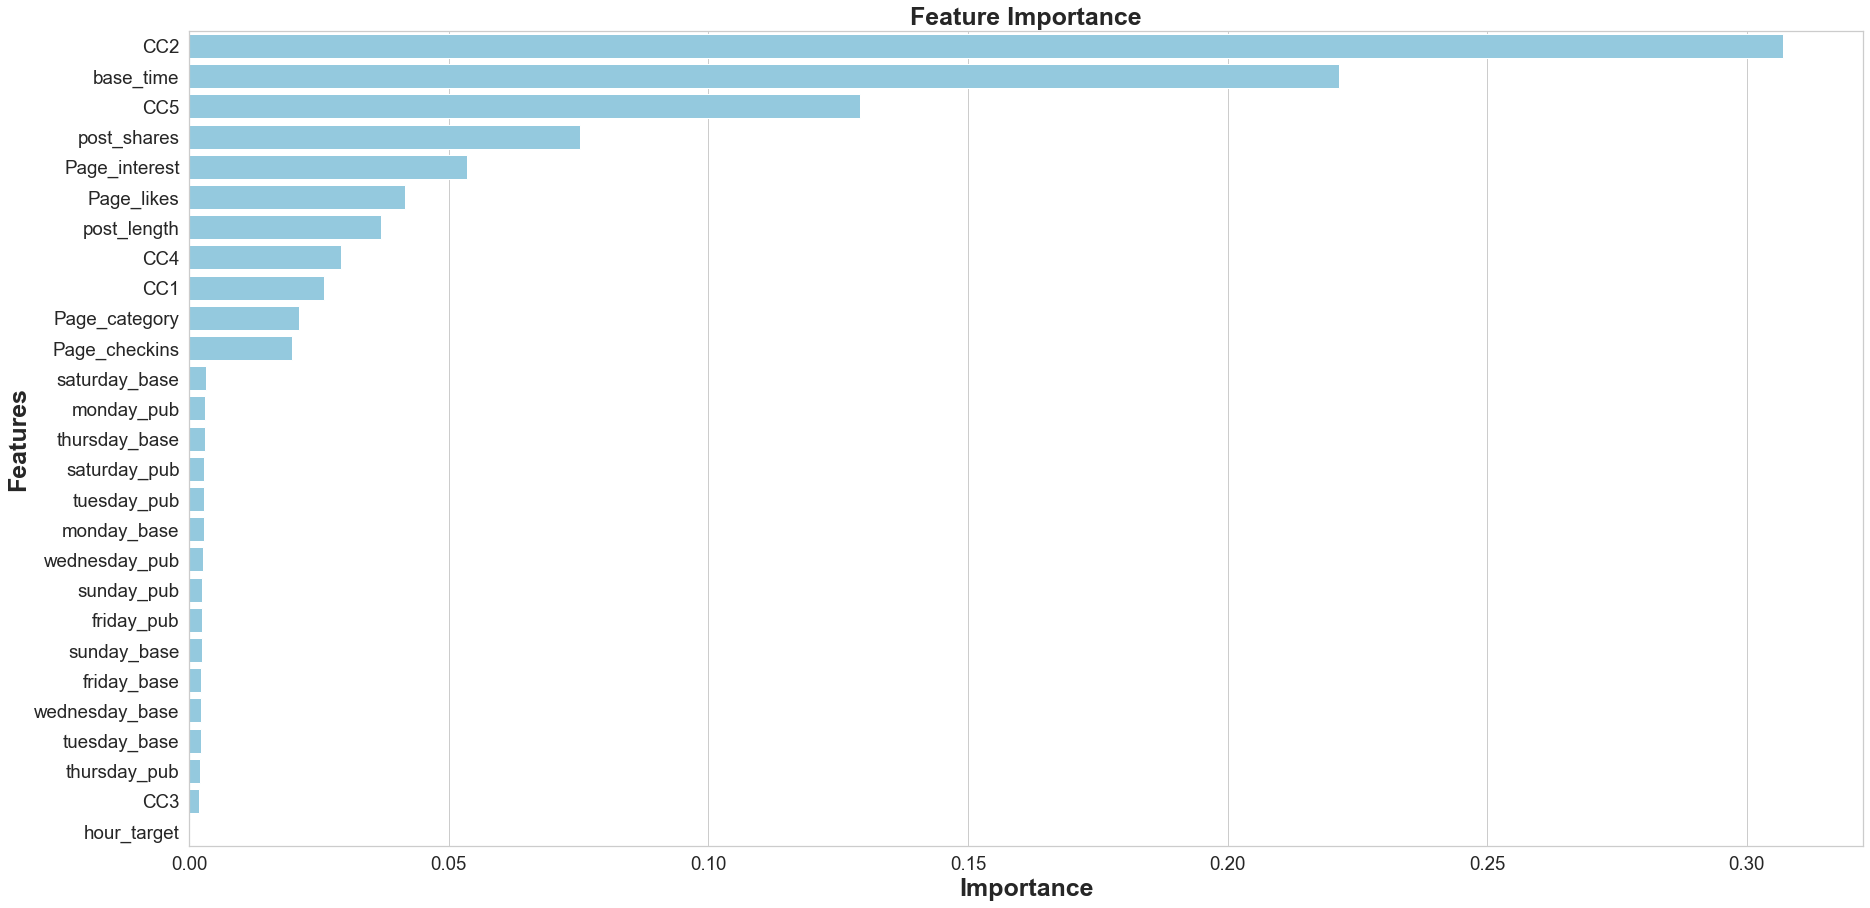

In [29]:
feats = {}
regressor= RandomForestRegressor()
regressor.fit(X_train,y_train)
for feature, importance in zip(data_o.columns, regressor.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize=25, weight = 'bold')
plt.title('Feature Importance', fontsize=25, weight = 'bold')

#plt.savefig('Feature importance.png', dpi=300, bbox_inches='tight')

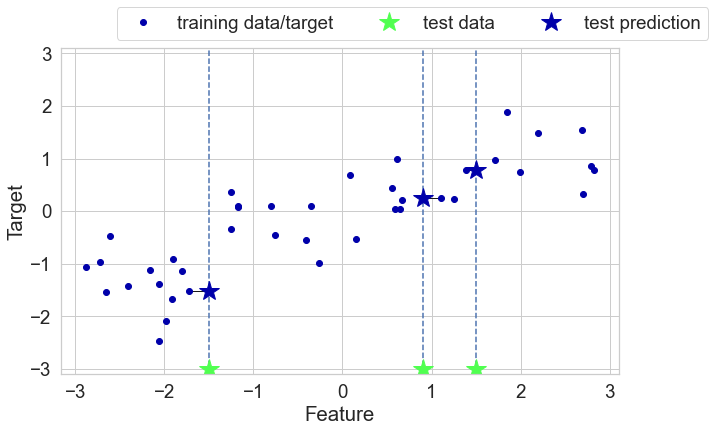

In [30]:
'''Knn'''
import mglearn 
mglearn.plots.plot_knn_regression(n_neighbors=1)
#plt.savefig('knn1Neigh.png', dpi=300, bbox_inches='tight')

In [31]:
from sklearn.neighbors import KNeighborsRegressor
kn = KNeighborsRegressor(n_neighbors=12)
kn.fit(X_train, y_train)
y_pred_kn = kn.predict(X_test)
mse_kn = mean_squared_error(y_test,y_pred_kn)
rms_kn = np.sqrt(mse_kn)
r2_kn = r2_score(y_test,y_pred_kn)

print('KN rmse:', rms_kn, 'KN r2:',r2_kn)


KN rmse: 7.654377708983051 KN r2: 0.46490849918435573


In [32]:
'''Linear Regression'''
model_lr = linear_model.LinearRegression() 
model_lr.fit(X_train,y_train)
y_pred_lr = model_lr.predict(X_test)
mse_lr = mean_squared_error(y_test,y_pred_lr)
rms_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test,y_pred_lr)

print('LR rmse:', rms_lr, 'LR r2:',r2_lr)

LR rmse: 8.012775713511795 LR r2: 0.4136266172624802


In [33]:
'''Random Forest Regressor'''
regressor=RandomForestRegressor()
regressor.fit(X_train,y_train)
y_pred=regressor.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2_rf = r2_score(y_test,y_pred)

print('RF rmse',rmse,'RF r2', r2_rf)

RF rmse 5.828711716170932 RF r2 0.6897202541717384


In [34]:
'''Decision Tree'''
model_dt = DecisionTreeRegressor() #max_depth = 5 gives us the most accurate decision tree
model_dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict(X_test)
mse_dt = mean_squared_error(y_test,y_pred_dt)
rms_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y_test,y_pred_dt)

print('DT rms',rms_dt,'DT r2',r2_dt)

DT rms 7.541416498787914 DT r2 0.4805854290335685


In [35]:
'''Gradient Boosting'''
from sklearn.ensemble import GradientBoostingRegressor
model_boost = GradientBoostingRegressor(random_state=0)
model_boost.fit(X_train, y_train)
y_pred_boost=model_boost.predict(X_test)
mse=mean_squared_error(y_test,y_pred_boost)
rmse_boost=np.sqrt(mse)
r2_boost=r2_score(y_test,y_pred_boost)
print('GB rms',rmse_boost,'GB r2',r2_boost)

GB rms 5.817470976411412 GB r2 0.6909158565410135


In [36]:
'''Best param selection boosting and random forest'''
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=10,stop=120,num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(1, 32, 32, endpoint=True)]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               }


boost_random = RandomizedSearchCV(estimator = model_boost, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=1, random_state=0, n_jobs = -1)
rf_random= RandomizedSearchCV(estimator = regressor, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=1, random_state=0, n_jobs = -1)
# Fit the random search model
boost_random.fit(X_train, y_train)
rf_random.fit(X_train, y_train)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, 26, 27,
                                                      28, 29, 30, ...],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 22, 34, 46, 58, 71,
                                                         83, 95, 107, 120]},
                   random_state=0, verbose=1)

In [37]:
'''Best param selection for Linear Regression'''
from sklearn.model_selection import RandomizedSearchCV
fit_intercept= [True,False]
positive=[True,False]

random_grid = {'fit_intercept': fit_intercept,
               'positive': positive,
                }


lr_random = RandomizedSearchCV(estimator = model_lr, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=1, random_state=0, n_jobs = -1)

lr_random.fit(X_train, y_train)


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=100. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 4 candidates, totalling 20 fits


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=100. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 4 candidates, totalling 20 fits


RandomizedSearchCV(cv=5, estimator=LinearRegression(), n_iter=100, n_jobs=-1,
                   param_distributions={'fit_intercept': [True, False],
                                        'positive': [True, False]},
                   random_state=0, verbose=1)

In [46]:
'''Best param selection for Decision Tree'''
from sklearn.model_selection import RandomizedSearchCV
criterion=['mse', 'mae']
max_depth = [2,5,10]#try 25
max_features=['auto', 'sqrt']
splitter= ['best','random']
random_grid = {'criterion': criterion,
               'splitter': splitter,
               'max_depth':max_depth,
               'max_features': max_features
                }


dt_random = RandomizedSearchCV(estimator = model_dt, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=1, random_state=0, n_jobs = -1)

dt_random.fit(X_train, y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:285: UserWarning: The total space of parameters 24 is smaller than n_iter=100. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 24 candidates, totalling 120 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['mse', 'mae'],
                                        'max_depth': [2, 5, 10],
                                        'max_features': ['auto', 'sqrt'],
                                        'splitter': ['best', 'random']},
                   random_state=0, verbose=1)

In [42]:
'''Best param selection for kn'''
n_neighbors=[5,12,70]
weights=['uniform', 'distance']
algorithm=['auto', 'ball_tree', 'kd_tree' ]
metric=['minkowski','euclidean']


random_grid = {'n_neighbors': n_neighbors,
                'weights': weights,
               'algorithm':algorithm,
               'metric': metric
                }


kn_random = RandomizedSearchCV(estimator = kn, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=1, random_state=0, n_jobs = -1)
kn_random.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:285: UserWarning: The total space of parameters 36 is smaller than n_iter=100. Running 36 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 36 candidates, totalling 180 fits


RandomizedSearchCV(cv=5, estimator=KNeighborsRegressor(n_neighbors=12),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree'],
                                        'metric': ['minkowski', 'euclidean'],
                                        'n_neighbors': [5, 12, 70],
                                        'weights': ['uniform', 'distance']},
                   random_state=0, verbose=1)

In [47]:
kn_best_param=kn_random.best_params_
print('KN best parameters:', kn_best_param)
dt_best_param=dt_random.best_params_
print('DT best parameters:',dt_best_param)
lr_best_param=lr_random.best_params_
print('LR best parameters:',lr_best_param)
boost_best_param=boost_random.best_params_
print('GB best parameters:',boost_best_param)
rf_best_param=rf_random.best_params_
print('RF best parameters:',rf_best_param)

KN best parameters: {'weights': 'distance', 'n_neighbors': 12, 'metric': 'minkowski', 'algorithm': 'auto'}
DT best parameters: {'splitter': 'best', 'max_features': 'auto', 'max_depth': 5, 'criterion': 'mse'}
LR best parameters: {'positive': False, 'fit_intercept': True}
GB best parameters: {'n_estimators': 46, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 7}
RF best parameters: {'n_estimators': 83, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 27}


In [49]:
from sklearn.metrics import make_scorer
from sklearn import model_selection
models=[]
models.append(('Gradient Boosting',GradientBoostingRegressor(n_estimators= 46,
                                                 min_samples_split= 10,
                                                 min_samples_leaf= 2,
                                                 max_features= 'sqrt',
                                                 max_depth= 7)))
models.append(('Random Forest', RandomForestRegressor(n_estimators= 83,
                                                      min_samples_split= 2,
                                                      min_samples_leaf= 4,
                                                      max_features= 'auto',
                                                      max_depth= 27)))
models.append(('Linear Regression', LinearRegression(positive= False, 
                                                      fit_intercept= True)))
              
models.append(('Decision Tree Regressor', DecisionTreeRegressor(splitter= 'best',
                                                                max_features= 'auto',
                                                                max_depth= 5,
                                                                criterion= 'mse')))
              
models.append(('KNN', KNeighborsRegressor(weights= 'distance',
                                          n_neighbors= 12,
                                          metric= 'minkowski',
                                          algorithm= 'auto')))  
              

results_rmse = []
results_r2 = []              
names = []

for name, model in models:
    #train, test splits
    kfold = model_selection.KFold(n_splits=5)
    #the results
    cv_results_rmse = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_root_mean_squared_error')
    cv_results_r2 = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='r2')
    results_rmse.append(abs(cv_results_rmse))
    results_r2.append(cv_results_r2)          
    names.append(name)
    
    msg = "%s: %f  %f " % (name, abs(cv_results_rmse.mean()), cv_results_r2.mean())
    print(msg)

Gradient Boosting: 5.563079  0.705940 
Random Forest: 5.558054  0.706574 
Linear Regression: 7.678033  0.438808 
Decision Tree Regressor: 6.401728  0.612299 
KNN: 7.391820  0.480014 


[Text(1, 0, 'Gradient Boosting'),
 Text(2, 0, 'Random Forest'),
 Text(3, 0, 'Linear Regression'),
 Text(4, 0, 'Decision Tree Regressor'),
 Text(5, 0, 'KNN')]

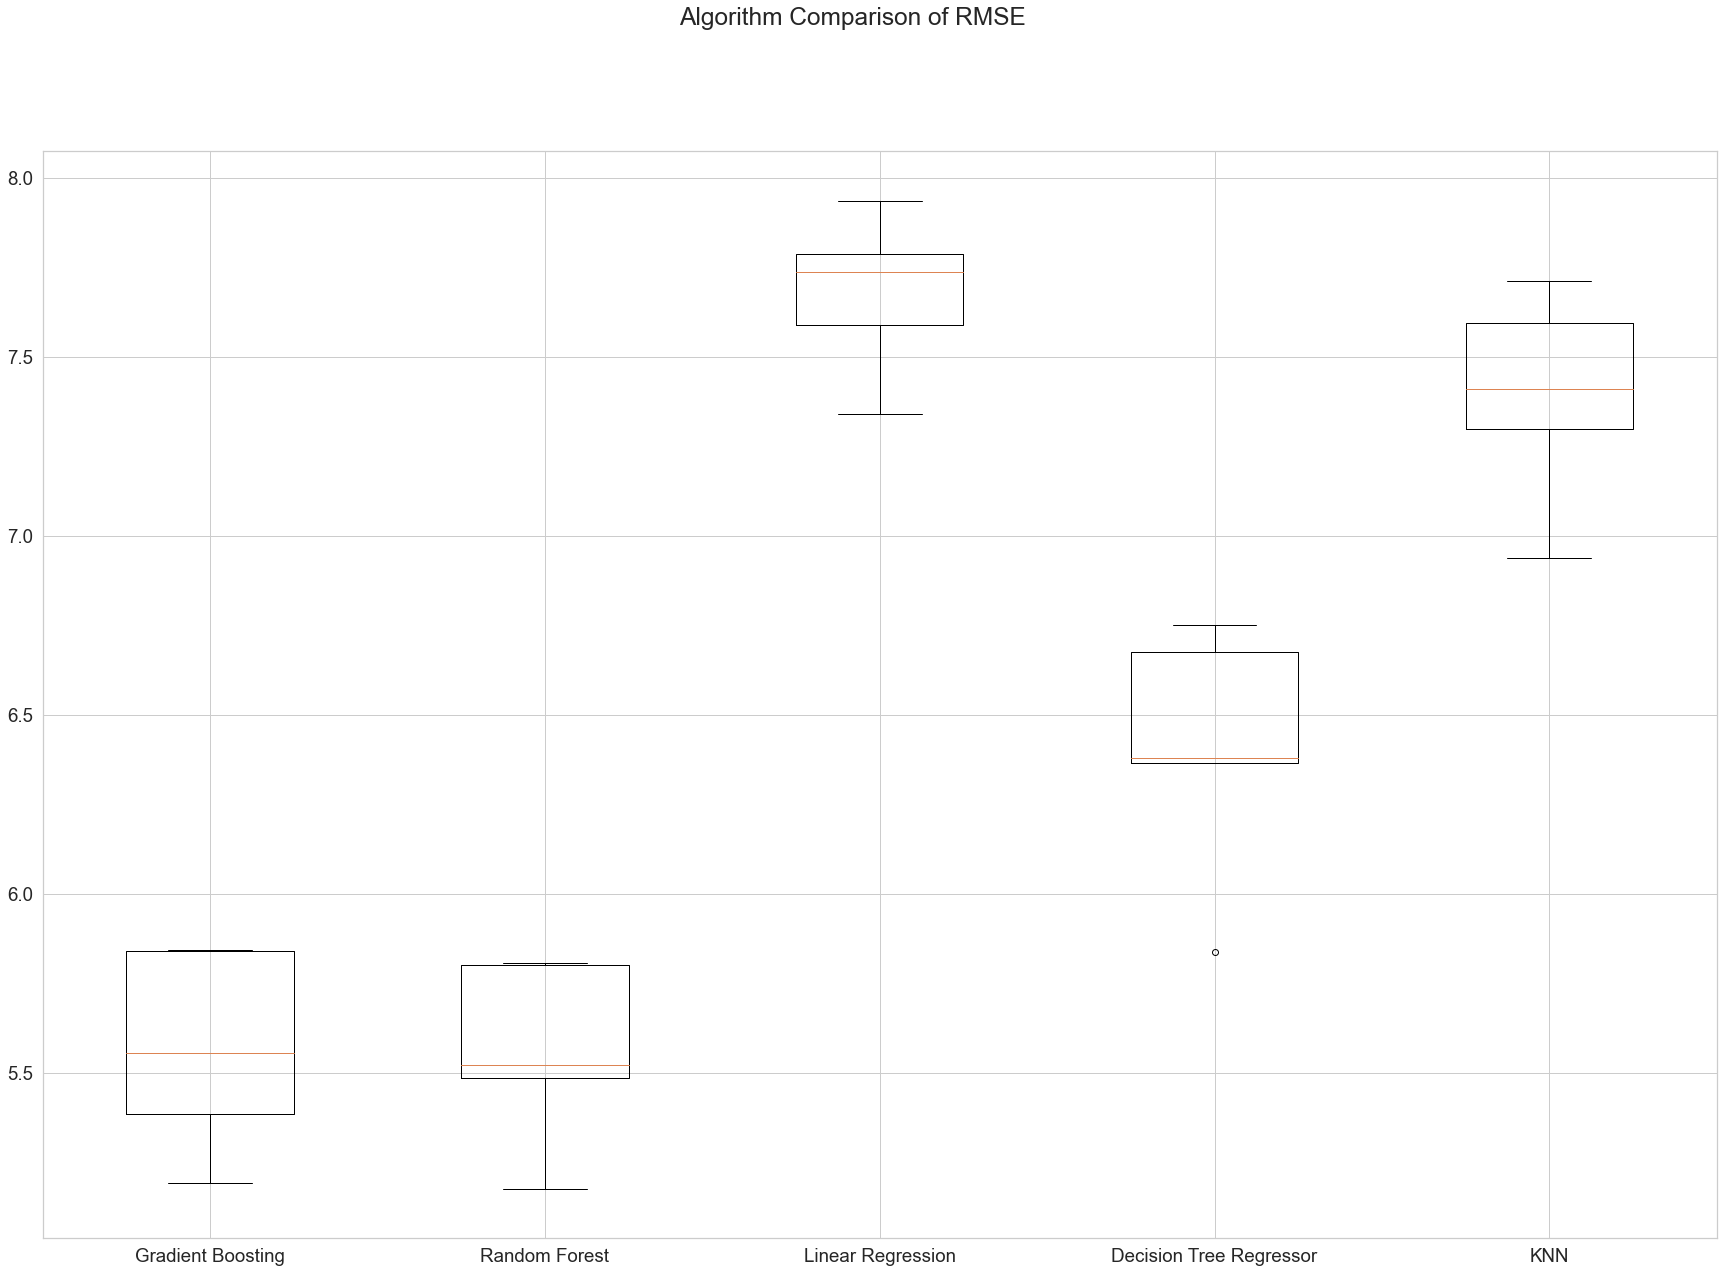

In [50]:
fig = plt.figure()
fig.set_size_inches(30,20)
fig.suptitle('Algorithm Comparison of RMSE')
ax = fig.add_subplot(111)
plt.boxplot(results_rmse)
ax.set_xticklabels(names)
#plt.savefig('Algorithm Comparison of RMSE c.png', dpi=300, bbox_inches='tight')

[Text(1, 0, 'Gradient Boosting'),
 Text(2, 0, 'Random Forest'),
 Text(3, 0, 'Linear Regression'),
 Text(4, 0, 'Decision Tree Regressor'),
 Text(5, 0, 'KNN')]

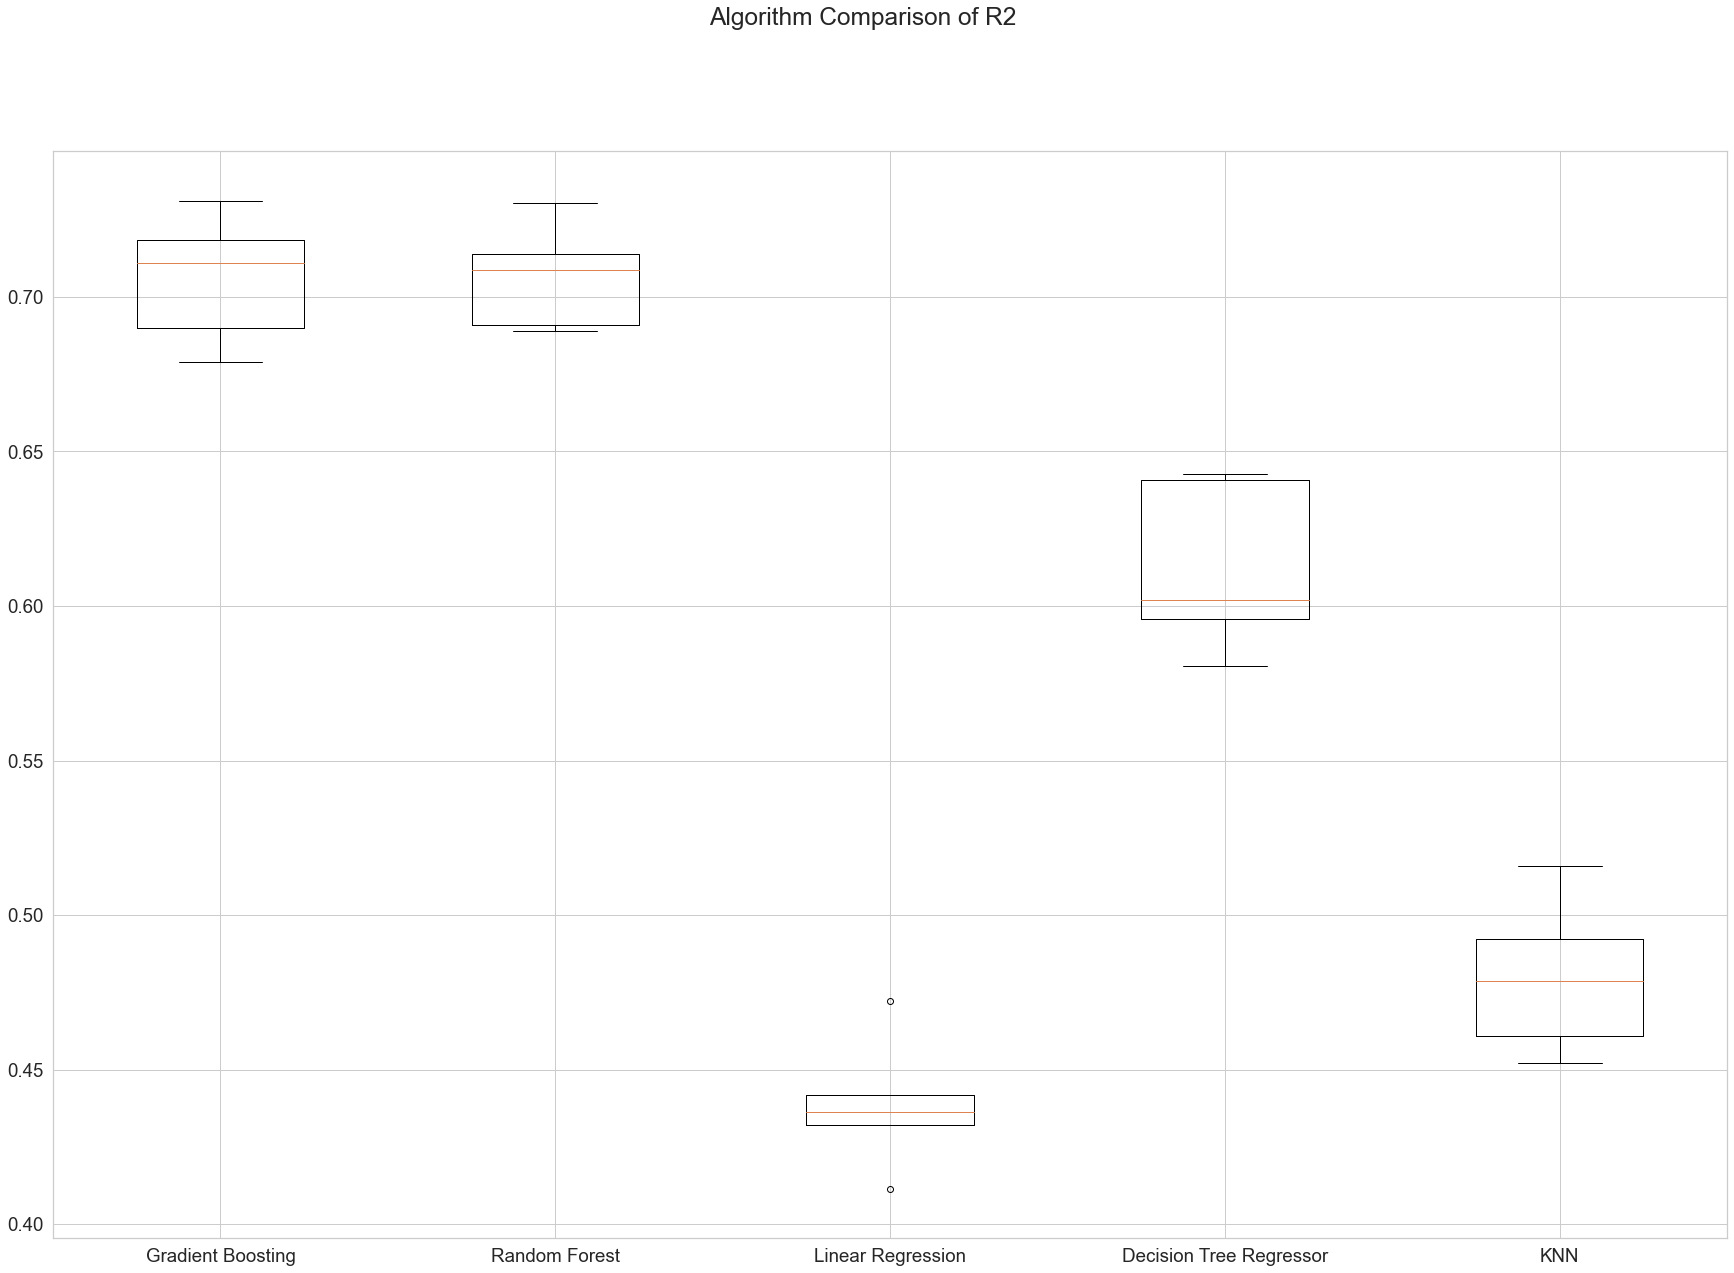

In [51]:
fig = plt.figure()
fig.set_size_inches(30,20)
fig.suptitle('Algorithm Comparison of R2')
ax = fig.add_subplot(111)
plt.boxplot(results_r2)
ax.set_xticklabels(names)
#plt.savefig('Algorithm Comparison of R2 c.png', dpi=300, bbox_inches='tight')